# Wine Quality Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
Data = pd.read_csv("C:/Users/hp/OneDrive/Desktop/4 th trisemister/WineQT.csv")
Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
Data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [4]:
Data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
Data.isnull().mean()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Id                      0.0
dtype: float64

In [6]:
Data.shape

(1143, 13)

In [7]:
x=Data.drop(columns=['Id','quality'],axis=1)
x.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


<AxesSubplot:>

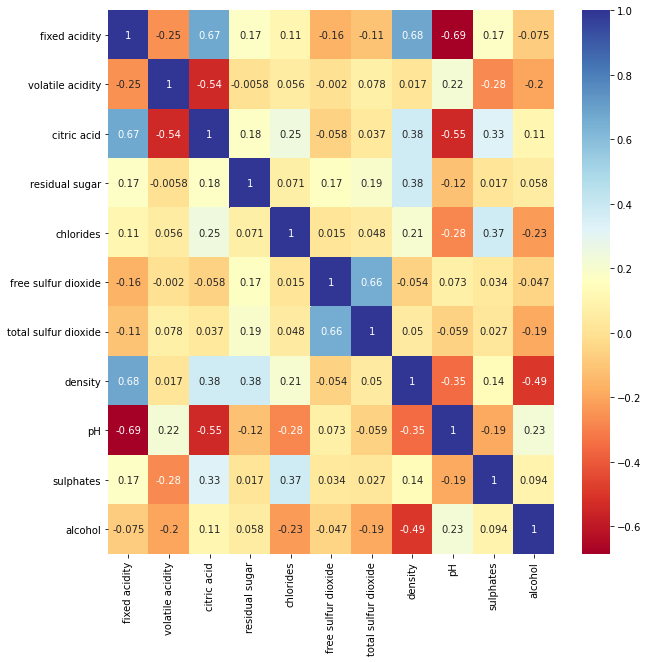

In [8]:
plt.figure(figsize=(10,10)) 
sns.heatmap(x.corr(),annot =True,cmap='RdYlBu')

In [9]:
y = Data['density']
y.head()

0    0.9978
1    0.9968
2    0.9970
3    0.9980
4    0.9978
Name: density, dtype: float64

In [10]:
scaler = StandardScaler()
ann = scaler.fit_transform(x)
print(ann)

[[-0.52157961  0.93933222 -1.36502663 ...  1.27069495 -0.57365783
  -0.96338181]
 [-0.29259344  1.94181282 -1.36502663 ... -0.70892755  0.1308811
  -0.59360107]
 [-0.29259344  1.27349242 -1.16156762 ... -0.32577481 -0.04525363
  -0.59360107]
 ...
 [-1.20853813  0.38239855 -0.9581086  ...  0.88754221 -0.45623467
   0.05351522]
 [-1.38027776  0.10393172 -0.8563791  ...  1.33455374  0.60057372
   0.70063152]
 [-1.38027776  0.6330187  -0.75464959 ...  1.65384769  0.30701583
  -0.22382033]]


In [11]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.25)

In [12]:
lin = LinearRegression()
lin.fit(train_x,train_y)

LinearRegression()

In [13]:
predi = lin.predict(test_x)
ww = lin.intercept_
ww

-6.994405055138486e-15

In [14]:
model = lin.coef_
model

array([ 1.65196251e-17, -8.65193334e-17, -2.89851286e-16, -7.92822839e-19,
        2.20356738e-15, -5.69206141e-19,  3.79470760e-19,  1.00000000e+00,
        7.17403025e-17, -6.95608867e-17,  3.40769825e-17])

In [15]:
print(predi)

[0.9988  0.99667 0.9972  0.99258 0.99604 0.99364 0.99547 0.9991  0.99358
 0.99458 0.9991  0.9956  0.9982  0.99622 0.9969  0.99374 0.99725 1.0026
 1.0014  0.9986  0.9961  0.99568 0.9994  0.998   0.9964  0.9956  0.9972
 0.99736 0.99612 0.99518 0.99708 0.99491 0.99803 0.99007 0.9982  0.9976
 0.99633 0.9994  0.9997  0.9948  0.99708 0.9976  0.9968  0.9952  0.99768
 0.99788 0.99718 0.99636 0.9976  0.99745 0.9991  0.99774 0.99516 0.99836
 0.9981  0.9973  0.99648 0.99656 0.9956  0.9959  0.99656 0.99842 0.9986
 0.996   0.9967  0.998   0.9962  0.9986  0.99801 0.99627 0.99855 0.9962
 0.99476 0.99531 0.9959  0.99536 0.9958  0.9984  0.999   0.99724 0.9979
 0.9994  0.9972  0.99488 0.9994  0.997   0.99576 0.99649 0.9978  0.9981
 0.99378 0.99504 0.9961  0.99588 0.9973  0.9994  0.9963  0.9968  0.9952
 0.9962  0.99888 0.99484 0.99716 0.9965  0.9972  0.99498 0.99652 1.001
 0.9972  0.99386 0.99538 0.99769 0.99682 0.99615 1.0002  0.99542 0.99824
 0.9966  0.99448 0.99824 0.99294 0.9961  0.9947  0.9976  0.99

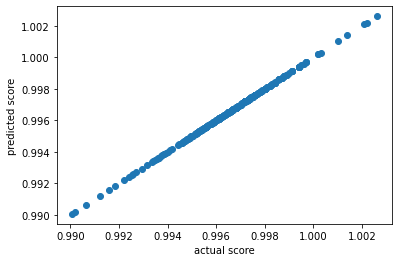

In [16]:
plt.scatter(test_y,predi)
plt.xlabel('actual score')
plt.ylabel('predicted score')
plt.show()

In [17]:
r2 = r2_score(test_y,predi)
r2

1.0

In [18]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
lin.predict([[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]])

array([0.9978])

In [20]:
error = 0.9978 - 0.9978
error

0.0

In [21]:
if r2 >= 0.7:
    print("The model has a strong fit and performs well.")
elif r2 >= 0.5:
    print("The model has a moderate fit and gives decent predictions.")
else:
    print("The model may need further improvement as it has a weak fit.")

print("You can further refine the model by feature engineering and hyperparameter tuning to improve its performance.")

The model has a strong fit and performs well.
You can further refine the model by feature engineering and hyperparameter tuning to improve its performance.


In the provided Jupyter Notebook code, the data is loaded, preprocessed, and split into training and testing sets. A linear regression model is created, fitted to the training data, and used to make predictions. The model's performance is evaluated using metrics.

The conclusion advises considering classification techniques if the aim is to predict wine quality as an ordinal variable since linear regression is not an ideal choice for this task. Classification models are more suitable for predicting discrete categories, such as wine quality ratings.